# ORO PROJECT PYTHON

#### Group Members:
* **SYEINRITA DEVI ANBEALAGAN MCS221022**
* **FAN CHIN WEI MCS221024**
* **ZHANG QI WEI MCS221013**



- Due: 22nd January 2024
- Mode: Group Assignment
- Submission: E-Learning

In [1]:
# import PuLP modeler functions
from pulp import *

### Question a

In [2]:
# Creates a list of all the supply nodes
Plants=['Kingsport','Danville','Macon','Selma','Columbus','Allentown','Dummy Plant']

In [3]:
# Creates a dictionary for the number of units of supply for each supply node

supply ={'Kingsport':35,
         'Danville':26,
         'Macon':42,
         'Selma':53,
         'Columbus':29,
         'Allentown':38,
         'Dummy Plant':27
        }

In [4]:
# Creates a list of all demand nodes
Sites =['Whitewater','Los Canos','Duras']

In [5]:
# Creates a dictionary for the number of units of demand for each demand node
demand = {'Whitewater':65,
          'Los Canos':80,
          'Duras':105
}

In [6]:
costs = [#Plants
#A B C
[12,15,17],# 1 Sites
[14,9,10], #2
[13,20,11], #3
[17,16,19], #4
[7,14,12], #5
[22,16,18], #6
[0,0,0] #7
]

In [7]:
# The cost data is made into a dictionary
costs = makeDict([Plants,Sites],costs,0)

In [8]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Waste_Distribution_Transportation_Model_Q1",LpMinimize)

In [9]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(i,j) for i in Plants for j in Sites]

In [10]:
# A dictionary called ‘vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Plants,Sites),0,None,LpInteger)

In [11]:
# The objective function is added to 'prob' first
prob += lpSum([vars[i][j]*costs[i][j] for (i,j) in Routes]), "Sum_of_Transporting_Costs"

In [12]:
# The supply maximum constraints are added to prob for each supply node (Plants)
for i in Plants:
    prob += lpSum([vars[i][j] for j in Sites]) ==supply[i], "Sum_of_Products_out_of_Plants_%s"%i

In [13]:
# The demand minimum constraints are added to prob for each demand node (Sites)
for j in Sites:
    prob += lpSum([vars[i][j] for i in Plants]) ==demand[j], "Sum_of_Products_into_Sites%s"%j

In [14]:
# The problem data is written to an .lp file
prob.writeLP("Waste Distribution Transportation Model Question a.lp")

[Route_Allentown_Duras,
 Route_Allentown_Los_Canos,
 Route_Allentown_Whitewater,
 Route_Columbus_Duras,
 Route_Columbus_Los_Canos,
 Route_Columbus_Whitewater,
 Route_Danville_Duras,
 Route_Danville_Los_Canos,
 Route_Danville_Whitewater,
 Route_Dummy_Plant_Duras,
 Route_Dummy_Plant_Los_Canos,
 Route_Dummy_Plant_Whitewater,
 Route_Kingsport_Duras,
 Route_Kingsport_Los_Canos,
 Route_Kingsport_Whitewater,
 Route_Macon_Duras,
 Route_Macon_Los_Canos,
 Route_Macon_Whitewater,
 Route_Selma_Duras,
 Route_Selma_Los_Canos,
 Route_Selma_Whitewater]

In [15]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [16]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


In [17]:
# Each of the variables is printed with its resolved optimum value
for v in prob.variables():
    print(v.name, "=", "{:.2f}".format(v.varValue))

# The optimized objective function value is printed to the screen with two decimal places
print("Total Cost of Transportation = RM {:.2f}".format(value(prob.objective)))

Route_Allentown_Duras = 10.00
Route_Allentown_Los_Canos = 28.00
Route_Allentown_Whitewater = 0.00
Route_Columbus_Duras = 0.00
Route_Columbus_Los_Canos = 0.00
Route_Columbus_Whitewater = 29.00
Route_Danville_Duras = 26.00
Route_Danville_Los_Canos = 0.00
Route_Danville_Whitewater = 0.00
Route_Dummy_Plant_Duras = 27.00
Route_Dummy_Plant_Los_Canos = 0.00
Route_Dummy_Plant_Whitewater = 0.00
Route_Kingsport_Duras = 0.00
Route_Kingsport_Los_Canos = 0.00
Route_Kingsport_Whitewater = 35.00
Route_Macon_Duras = 42.00
Route_Macon_Los_Canos = 0.00
Route_Macon_Whitewater = 0.00
Route_Selma_Duras = 0.00
Route_Selma_Los_Canos = 52.00
Route_Selma_Whitewater = 1.00
Total Cost of Transportation = RM 2822.00


### Network Diagram

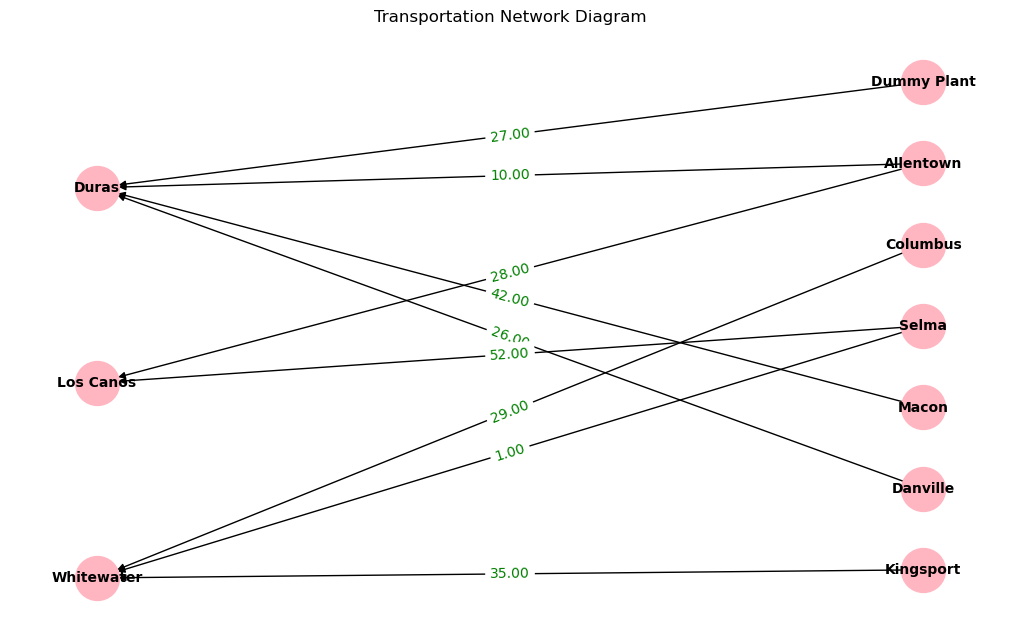

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Replace 'Plants' and 'Sites' with new names
plants = ['Whitewater', 'Los Canos', 'Duras']
sites = ['Kingsport', 'Danville', 'Macon', 'Selma', 'Columbus', 'Allentown', 'Dummy Plant']

# Replace 'supply' and 'demand' with your actual supply and demand dictionaries
supply = {'Whitewater': 100, 'Los Canos': 150, 'Duras': 200}
demand = {'Kingsport': 50, 'Danville': 75, 'Macon': 100, 'Selma': 120, 'Columbus': 90, 'Allentown': 110, 'Dummy Plant': 0}

# Add nodes for plants
space_between_plants = 0.48  # Adjust as needed
for plant in plants:
    G.add_node(plant, pos=(0, (plants.index(plant) - len(plants) / 2) * space_between_plants), demand=-supply.get(plant, 0))

# Increase space between sites by adjusting x-coordinate
space_between_sites = 0.2  # Adjust as needed
for site in sites:
    G.add_node(site, pos=(1, (sites.index(site) - len(sites) / 2) * space_between_sites), demand=demand.get(site, 0))

# Add edges with capacities
for (i, j) in Routes:
    capacity = vars[i][j].varValue
    if capacity > 0:
        G.add_edge(i, j, weight=costs[i][j], capacity=capacity)

# Set custom positions for better layout
custom_pos = {plant: (0, (plants.index(plant) - len(plants) / 2) * space_between_plants) for plant in plants}
custom_pos.update({site: (1, (sites.index(site) - len(sites) / 2) * space_between_sites) for site in sites})

pos = nx.get_node_attributes(G, 'pos')

# Format edge labels with two decimal places
edge_labels = {(i, j): "{:.2f}".format(vars[i][j].varValue) for (i, j) in Routes if vars[i][j].varValue > 0}

plt.figure(figsize=(10, 6))
nx.draw(G, pos=custom_pos, with_labels=True, node_size=1000, node_color='lightpink', font_size=10, font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=custom_pos, edge_labels=edge_labels, font_color='green')
plt.title("Transportation Network Diagram")
plt.show()


### Question b

In [19]:
# Import PuLP modeler functions
from pulp import *

# Creates a list of all the supply nodes (Plants)
Plants = ['Kingsport', 'Danville', 'Macon', 'Selma', 'Columbus', 'Allentown', 'Dummy Plant']

# Creates a dictionary for the number of units of supply for each supply node (Plants)
supply = {'Kingsport': 35,
          'Danville': 26,
          'Macon': 42,
          'Selma': 53,
          'Columbus': 29,
          'Allentown': 38,
          'Dummy Plant': 27}

# Creates a list of costs of each transportation path (Direct Shipping)
costs_1 = [[0, 6, 4, 9, 7, 8, 0],
           [6, 0, 11, 10, 12, 7, 0],
           [5, 11, 0, 3, 7, 15, 0],
           [9, 10, 3, 0, 3, 16, 0],
           [7, 12, 7, 3, 0, 14, 0],
           [8, 7, 15, 16, 14, 0, 0],
           [0, 0, 0, 0, 0, 0, 0]]

# List of Intermediate Plants
Intermediate_Plants = ['Kingsport', 'Danville', 'Macon', 'Selma', 'Columbus', 'Allentown']

# Supply data for Intermediate Plants
supply1 = {'Kingsport': 35,
           'Danville': 26,
           'Macon': 42,
           'Selma': 53,
           'Columbus': 29,
           'Allentown': 38}

# Creates a list of all demand nodes (Waste Disposal Sites)
Waste_Disposal_Sites = ['Whitewater', 'Los Canos', 'Duras']

# Creates a dictionary for the number of units of demand for each demand node (Waste Disposal Sites)
demand = {
    'Whitewater': 65,
    'Los Canos': 80,
    'Duras': 105,
}

# Creates a list of costs of each transportation path (Transshipment)
costs_2 = [[12, 15, 17],
           [14, 9, 10],
           [13, 20, 11],
           [17, 16, 19],
           [7, 14, 12],
           [22, 16, 18]]

# The cost data is made into a dictionary
costs_1 = makeDict([Plants, Plants], costs_1, 0)

# The cost data is made into a dictionary
costs_2 = makeDict([Intermediate_Plants, Waste_Disposal_Sites], costs_2, 0)

In [20]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem('Material_Supply_Problem', LpMinimize)

In [21]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(i, j) for i in Plants for j in Plants]

# A dictionary called 'Vars' is created to contain the referenced variables (the routes)
vars = LpVariable.dicts('Route_1', (Plants, Plants), 0, None, LpInteger)

# Creates a list of tuples containing all the possible routes for transport (Transshipment)
Routes_2 = [(w, b) for w in Intermediate_Plants for b in Waste_Disposal_Sites]

# A dictionary called 'Vars_2' is created to contain the referenced variables (the routes) for Transshipment
vars_2 = LpVariable.dicts('Route_2', (Intermediate_Plants, Waste_Disposal_Sites), 0, None, LpInteger)

In [22]:
# The objective function is added to 'prob' first
prob += (
    lpSum(([vars[s][w] * costs_1[s][w] for (s, w) in Routes])) + (lpSum([vars_2[w][b] * costs_2[w][b] for (w, b) in Routes_2])),
    'Sum_of_Transporting_Costs',
)

In [23]:
# The supply maximum constraints are added to prob for each supply node (Plants)
for s in Plants:
    prob += (lpSum([vars[s][w] for w in Plants]) == supply[s],
             'Sum_of_Products_out_of_Plants_%s' % s,)

# The demand minimum constraints are added to prob for each demand node (Waste Disposal Sites)
for b in Waste_Disposal_Sites:
    prob += (lpSum([vars_2[w][b] for w in Intermediate_Plants]) == demand[b],
             'Sum_of_Products_into_Waste_Disposal_Sites_%s' % b,)

# Transshipment constraints: What is shipped into an Intermediate Plant must be shipped out.
for w in Intermediate_Plants:
    prob += (lpSum([vars[s][w] for s in Plants]) - lpSum([vars_2[w][p] for p in Waste_Disposal_Sites]) == 0,
             'Sum_of_Products_out_of_Intermediate_Plant_%s' % w,)

In [24]:
# Write LP Function
prob.writeLP("Waste Disposal Transshipment Model Question b.lp")

[Route_1_Allentown_Allentown,
 Route_1_Allentown_Columbus,
 Route_1_Allentown_Danville,
 Route_1_Allentown_Dummy_Plant,
 Route_1_Allentown_Kingsport,
 Route_1_Allentown_Macon,
 Route_1_Allentown_Selma,
 Route_1_Columbus_Allentown,
 Route_1_Columbus_Columbus,
 Route_1_Columbus_Danville,
 Route_1_Columbus_Dummy_Plant,
 Route_1_Columbus_Kingsport,
 Route_1_Columbus_Macon,
 Route_1_Columbus_Selma,
 Route_1_Danville_Allentown,
 Route_1_Danville_Columbus,
 Route_1_Danville_Danville,
 Route_1_Danville_Dummy_Plant,
 Route_1_Danville_Kingsport,
 Route_1_Danville_Macon,
 Route_1_Danville_Selma,
 Route_1_Dummy_Plant_Allentown,
 Route_1_Dummy_Plant_Columbus,
 Route_1_Dummy_Plant_Danville,
 Route_1_Dummy_Plant_Dummy_Plant,
 Route_1_Dummy_Plant_Kingsport,
 Route_1_Dummy_Plant_Macon,
 Route_1_Dummy_Plant_Selma,
 Route_1_Kingsport_Allentown,
 Route_1_Kingsport_Columbus,
 Route_1_Kingsport_Danville,
 Route_1_Kingsport_Dummy_Plant,
 Route_1_Kingsport_Kingsport,
 Route_1_Kingsport_Macon,
 Route_1_Kingspo

In [25]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [26]:
# Each of the variables is printed with its resolved optimum value
for v in prob.variables():
    print(v.name, "=", "{:.2f}".format(v.varValue))

# The optimized objective function value is printed to the screen with two decimal places
print("Total Cost of Transportation = RM {:.2f}".format(value(prob.objective)))

Route_1_Allentown_Allentown = 0.00
Route_1_Allentown_Columbus = 0.00
Route_1_Allentown_Danville = 38.00
Route_1_Allentown_Dummy_Plant = 0.00
Route_1_Allentown_Kingsport = 0.00
Route_1_Allentown_Macon = 0.00
Route_1_Allentown_Selma = 0.00
Route_1_Columbus_Allentown = 0.00
Route_1_Columbus_Columbus = 29.00
Route_1_Columbus_Danville = 0.00
Route_1_Columbus_Dummy_Plant = 0.00
Route_1_Columbus_Kingsport = 0.00
Route_1_Columbus_Macon = 0.00
Route_1_Columbus_Selma = 0.00
Route_1_Danville_Allentown = 0.00
Route_1_Danville_Columbus = 0.00
Route_1_Danville_Danville = 26.00
Route_1_Danville_Dummy_Plant = 0.00
Route_1_Danville_Kingsport = 0.00
Route_1_Danville_Macon = 0.00
Route_1_Danville_Selma = 0.00
Route_1_Dummy_Plant_Allentown = 0.00
Route_1_Dummy_Plant_Columbus = 0.00
Route_1_Dummy_Plant_Danville = 27.00
Route_1_Dummy_Plant_Dummy_Plant = 0.00
Route_1_Dummy_Plant_Kingsport = 0.00
Route_1_Dummy_Plant_Macon = 0.00
Route_1_Dummy_Plant_Selma = 0.00
Route_1_Kingsport_Allentown = 0.00
Route_1_Kings